# 앙상블 (Ensemble)


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

### Voting
- hard voting: 여러 개의 예측치에 대해 다수결로 결정
- soft voting: 여러 개의 예측 확률을 평균내어 결정

##### 위스콘신 유방암 데이터셋 (Wisconsin Breast Cancer Dataset)

유방암의 악성(Malignant)과 양성(Benign)을 분류하기 위해 자주 사용되는 데이터셋
(의학적인 이미지를 바탕으로 유방암 종양의 특징을 수치화한 데이터)

**데이터셋 개요**
- **목적**: 유방암 종양이 악성(Malignant)인지, 양성(Benign)인지 분류
- **샘플 수**: 569개
- **특징(Features) 수**: 30개 (==30개의 컬럼)
- **타겟(Target)**: 0(악성) 또는 1(양성)

**데이터 구성**
1. **Radius mean**: 종양의 평균 반지름
2. **Texture mean**: 종양의 표면의 거칠기
3. **Perimeter mean**: 종양의 평균 둘레 길이
4. **Area mean**: 종양의 평균 면적
5. **Smoothness mean**: 종양의 매끄러움 정도
6. **Compactness mean**: 종양의 압축도
7. **Concavity mean**: 종양의 오목함
8. **Concave points mean**: 종양의 오목한 점 개수
9. **Symmetry mean**: 종양의 대칭성
10. **Fractal dimension mean**: 종양의 프랙탈 차원 

---

### load data

In [5]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
# data.keys() #['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']
# print(data.DESCR)

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [6]:
#  데이터 준비 (분리)
from sklearn.model_selection import train_test_split

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

---

##### hard voting

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# 모델 객체 생성
knn_clf = KNeighborsClassifier()
lr_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier()

voting_clf = VotingClassifier(
    estimators=[
        ('knn_clf', knn_clf),
        ('lr_clf', lr_clf),
        ('dt_clf', dt_clf)
    ], # 투표에 참여할 모델들
    voting='hard' # default 값
)

# 앙상블 모델 학습
voting_clf.fit(X_train, y_train)

# 예측 및 평가
y_pred_train = voting_clf.predict(X_train)
acc_score_train = accuracy_score(y_train, y_pred_train) # 실제값과 예측값 넣어 평가
print('학습 점수: ', acc_score_train)

y_pred_test = voting_clf.predict(X_test)
acc_score_test = accuracy_score(y_test, y_pred_test) # 실제값과 예측값 넣어 평가
print('테스트 점수: ', acc_score_test)

학습 점수:  0.9647887323943662
테스트 점수:  0.951048951048951


In [8]:
# hard voting 작동 원리 == 다수결
start, end = 40, 50
voting_clf_pred = voting_clf.predict(X_test[start:end])
print('앙상블 예측값: ', voting_clf_pred)

for classifier in [knn_clf, lr_clf, dt_clf]:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    acc_score = accuracy_score(y_test, pred)

    class_name = classifier.__class__.__name__ # 객체를 중심으로 해서 클래스의 이름 속성을
    print('---------------')
    print(f'{class_name} 개별 정확도: {acc_score: .4f}')
    print(f'{class_name} 예측값: {pred[start:end]}')

앙상블 예측값:  [0 1 0 1 0 0 1 1 1 0]
---------------
KNeighborsClassifier 개별 정확도:  0.9371
KNeighborsClassifier 예측값: [0 1 0 1 0 0 1 1 1 0]
---------------
LogisticRegression 개별 정확도:  0.9441
LogisticRegression 예측값: [0 1 0 1 0 0 1 1 1 0]
---------------
DecisionTreeClassifier 개별 정확도:  0.9021
DecisionTreeClassifier 예측값: [1 1 0 1 0 0 1 0 1 0]


##### soft voting

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# 모델 객체 생성
knn_clf = KNeighborsClassifier()
lr_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier(random_state=0) # 설정 안하면 test 점수 바뀜뀜

voting_clf = VotingClassifier(
    estimators=[
        ('knn_clf', knn_clf),
        ('lr_clf', lr_clf),
        ('dt_clf', dt_clf)
    ], # 투표에 참여할 모델들
    voting='soft' # default 값
)

# 앙상블 모델 학습
voting_clf.fit(X_train, y_train)

# 예측 및 평가
y_pred_train = voting_clf.predict(X_train)
acc_score_train = accuracy_score(y_train, y_pred_train) # 실제값과 예측값 넣어 평가
print('학습 점수: ', acc_score_train)

y_pred_test = voting_clf.predict(X_test)
acc_score_test = accuracy_score(y_test, y_pred_test) # 실제값과 예측값 넣어 평가
print('테스트 점수: ', acc_score_test)

학습 점수:  0.9859154929577465
테스트 점수:  0.9370629370629371


In [10]:
# soft voting 작동 원리 == 각 예측기의 확률값 평균
# 모델이 계산한 값과 직접 평균 계산한 값이 같은지 확인하기
start, end = 40, 50

voting_clf_pred_proba = voting_clf.predict_proba(X_test[start:end])
print('앙상블 예측값: ', voting_clf_pred_proba)

averages = np.full_like(voting_clf_pred_proba, 0)

for classifier in [knn_clf, lr_clf, dt_clf]:
    # 개별 학습 및 예측
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    acc_score = accuracy_score(y_test, pred)
    pred_proba = classifier.predict_proba(X_test[start:end])

    # 예측 확률 평균을 위한 합계
    averages += pred_proba

    class_name = classifier.__class__.__name__ # 객체를 중심으로 해서 클래스의 이름 속성을
    # print('---------------')
    # print(f'{class_name} 개별 정확도: {acc_score: .4f}')
    # print(f'{class_name} 예측 확률: {pred_proba}')

# 예측 확률 평균 계산 및 출력
calc_averages = averages / 3
print('각 모델별 예측값의 평균:', calc_averages)
print(np.array_equal(voting_clf_pred_proba, calc_averages)) # True -> 각 데이터가 같은 위치에 같은 값을 가지고 있는지 확인해주는 함수:array_equal

앙상블 예측값:  [[5.70263157e-01 4.29736843e-01]
 [1.08113730e-03 9.98918863e-01]
 [9.99622506e-01 3.77494355e-04]
 [3.35757426e-04 9.99664243e-01]
 [9.00993416e-01 9.90065841e-02]
 [1.00000000e+00 1.75163138e-13]
 [7.79971341e-05 9.99922003e-01]
 [1.83004552e-02 9.81699545e-01]
 [1.14568790e-03 9.98854312e-01]
 [9.32982089e-01 6.70179112e-02]]
각 모델별 예측값의 평균: [[5.70263157e-01 4.29736843e-01]
 [1.08113730e-03 9.98918863e-01]
 [9.99622506e-01 3.77494355e-04]
 [3.35757426e-04 9.99664243e-01]
 [9.00993416e-01 9.90065841e-02]
 [1.00000000e+00 1.75163138e-13]
 [7.79971341e-05 9.99922003e-01]
 [1.83004552e-02 9.81699545e-01]
 [1.14568790e-03 9.98854312e-01]
 [9.32982089e-01 6.70179112e-02]]
True


---

### Bagging
- Bootstrap Aggregation
- Bootstrap 방식의 샘플링: 각 estimator마다 훈련 데이터를 뽑을 때, 중복값을 허용하는 방식
- 분류 모델의 경우, 각 tree(estimator)의 예측값을 다수결(hard voting) 결정
- 회귀 모델의 경우, 각 tree(estimator)의 예측값을 평균내어 결정
- 기본적으로 100개의 tree 사용

**하이퍼 파라미터**
| **하이퍼파라미터**      | **설명**                                                                                     | **기본값**      |
|--------------------------|--------------------------------------------------------------------------------------------|-----------------|
| `n_estimators`           | 생성할 트리의 개수 지정 (트리의 개수가 많을수록 성능이 좋아질 수 있지만 계산 비용 증가) | 100             |
| `criterion`              | 분할 품질을 측정하는 기준 (분류에서는 "gini" 또는 "entropy"를 사용)                 | "gini"          |
| `max_depth`              | 각 트리의 최대 깊이 (설정하지 않으면 트리는 잎 노드가 순수해질 때까지 계속 확장) | None            |
| `min_samples_split`      | 내부 노드를 분할하기 위해 필요한 최소 샘플 수 (과적합 방지 목적)                   | 2               |
| `min_samples_leaf`       | 잎 노드가 되기 위해 필요한 최소 샘플 수 (과적합 방지 목적)                          | 1               |
| `max_features`           | 각 트리를 분할할 때 고려할 최대 특성 수 ()"auto", "sqrt", "log2" 중 선택하거나, 특정 숫자 지정 가능) | "auto"          |
| `bootstrap`              | 각 트리를 만들 때 부트스트랩 샘플링을 사용할지 여부를 결정                               | True            |
| `random_state`           | 결과의 재현성을 위해 난수 시드 고정                                                  | None            |
| `n_jobs`                 | 병렬 계산을 위해 사용할 CPU 코어 수를 지정 (-1로 설정하면 모든 코어를 사용)           | None            |
| `class_weight`           | 각 클래스의 가중치를 자동으로 계산하거나 직접 지정 가능 (불균형 데이터 처리에 유용)    | None            |


In [11]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=100, 
    max_depth=7, 
    random_state=0
)

# 학습
rf_clf.fit(X_train, y_train)

y_pred_train = rf_clf.predict(X_train)
acc_scrore_train = accuracy_score(y_train, y_pred_train)
print('학습 점수: ', acc_score_train)

y_pred_test = rf_clf.predict(X_test)
acc_score_test = accuracy_score(y_test, y_pred_test)
print('테스트 평가 점수: ', acc_score_test)

학습 점수:  0.9859154929577465
테스트 평가 점수:  0.9790209790209791


In [13]:
# 100개의 decisiontree 확인
# print(rf_clf.estimators_)

# 100개의 decisiontree가 사용한 샘플 데이터 확인
# print(len(rf_clf.estimators_samples_)) # 예측기가 100개라 100개로 확인됨

# 100개의 DecisionTree 확인
# print(rf_clf.estimators_)

# 100개의 DecisionTree가 사용한 샘플데이터 확인
# print(len(rf_clf.estimators_samples_)) # 100
# print(len(rf_clf.estimators_samples_[0])) # 426

# Bootstrap 방식의 샘플링 확인
for i, sample_indexes in enumerate(rf_clf.estimators_samples_):
    print(f"{i}번째 DecisionTree의 샘플 인덱스: {sorted(sample_indexes)}")

0번째 DecisionTree의 샘플 인덱스: [np.int32(0), np.int32(0), np.int32(1), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(12), np.int32(12), np.int32(13), np.int32(16), np.int32(16), np.int32(16), np.int32(20), np.int32(22), np.int32(22), np.int32(24), np.int32(25), np.int32(25), np.int32(26), np.int32(31), np.int32(32), np.int32(32), np.int32(32), np.int32(35), np.int32(36), np.int32(36), np.int32(36), np.int32(38), np.int32(38), np.int32(40), np.int32(41), np.int32(41), np.int32(44), np.int32(45), np.int32(49), np.int32(49), np.int32(49), np.int32(53), np.int32(53), np.int32(55), np.int32(56), np.int32(56), np.int32(56), np.int32(57), np.int32(57), np.int32(57), np.int32(57), np.int32(59), np.int32(59), np.int32(60), np.int32(60), np.int32(62), np.int32(63), np.int32(63), np.int32(64), np.int32(65), np.int32(65), np.int32(66), np.int32(66), np.int32(66), np.int32(71), np.int32(72), np.int32(73), np.int32(75), np.int32(76), np.int32(77), np.

In [14]:
feat_imptc_ser = pd.Series(rf_clf.feature_importances_, index=data.feature_names).sort_values(ascending=False)
feat_imptc_ser

worst perimeter            0.163547
worst radius               0.117308
worst concave points       0.114409
mean concave points        0.103391
worst area                 0.061882
mean concavity             0.056032
mean perimeter             0.054363
mean area                  0.048603
worst concavity            0.038035
area error                 0.032931
radius error               0.029419
mean radius                0.024379
mean texture               0.016010
perimeter error            0.014571
worst texture              0.014562
worst smoothness           0.013452
worst compactness          0.012360
worst symmetry             0.012320
worst fractal dimension    0.009725
mean compactness           0.008854
mean smoothness            0.007140
concave points error       0.006683
texture error              0.006609
mean symmetry              0.006366
concavity error            0.006181
symmetry error             0.004600
fractal dimension error    0.004589
compactness error          0

<Axes: xlabel='None', ylabel='None'>

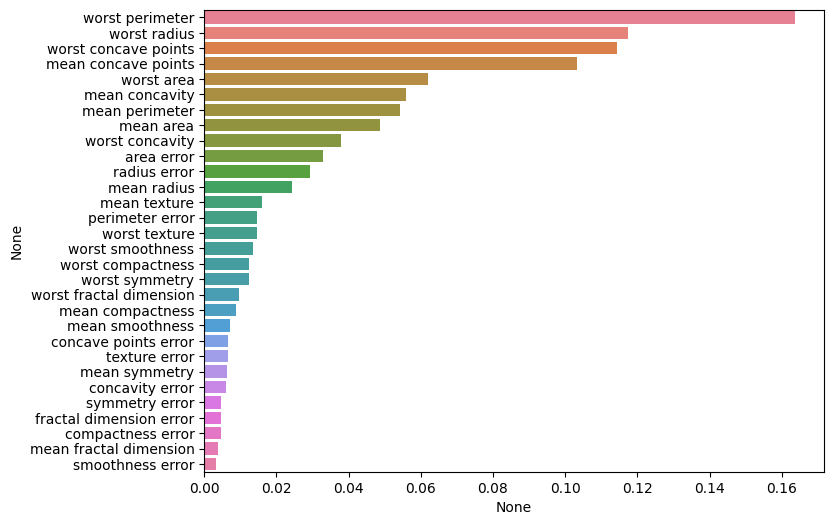

In [15]:
# 특성 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(
    x = feat_imptc_ser,
    y = feat_imptc_ser.index,
    hue = feat_imptc_ser.index
)

---

https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones 

사용자 행동 target class
- WALKING
- WALKING_UPSTAIRS
- WALKING_DOWNSTAIRS
- SITTING
- STANDING
- LAYING

**HAR 특성 설명**

| **특성 유형**             | **설명**                                                                                                                                     |
|--------------------------|--------------------------------------------------------------------------------------------------------------------------------------------|
| **Mean와 Std**            | 'tBodyAcc-mean()-X', 'tBodyAcc-std()-Y'와 같은 특성은 시간 도메인에서의 신체 가속도에 대한 평균 및 표준편차 값 ('X', 'Y', 'Z'는 축을 의미) |
| **주파수 도메인 특징**     | 이름에 'f'로 시작하는 특성은 주파수 도메인에서 계산된 값 (예를 들어 'fBodyAcc-meanFreq()-X'는 신체 가속도 센서의 X축에서의 평균 주파수 값)    |
| **가속도와 자이로스코프 데이터** | 'tBodyAcc', 'tGravityAcc', 'tBodyGyro' 등의 특성은 신체 가속도, 중력 가속도, 자이로스코프 데이터                                                  |
| **Jerk 신호**             | 'tBodyAccJerk-mean()-X'와 같은 특성은 가속도의 변화율 (활동 간의 차이를 분류하는 데 중요한 역할)                                          |
| **Magnitude(크기)**       | 'tBodyAccMag-mean()', 'tGravityAccMag-std()'와 같은 특성은 특정 축 방향의 가속도 또는 자이로스코프 값을 합친 크기                                             |
| **FFT 변환 기반 특징**    | 주파수 도메인에서의 데이터 특성들은 Fourier 변환을 통해 얻어짐 (예를 들어, 'fBodyAccMag-mean()'은 주파수 도메인에서 가속도의 크기의 평균값)                  |
| **Angle(각도)**           | 'angle(X,gravityMean)'과 같은 특성은 특정 축과 중력 벡터 간의 각도 (중력과의 상대적인 위치 나타냄)                                                    |
| **레이블**                | 'Activity' 컬럼에는 각 행의 활동 레이블이 포함 (걷기, 계단 오르기, 계단 내리기, 앉기, 서기, 눕기 등의 활동 종류 있음)                                          |


In [17]:
# 데이터 로드
train_data = pd.read_csv("data/har_train.csv")
test_data = pd.read_csv("data/har_test.csv")

train_data.shape, test_data.shape

((7352, 563), (2947, 563))

In [18]:
# 데이터 분리

In [19]:
# 레이블 인코딩

In [20]:
# 데이터 정규화

In [21]:
# RandomForestClassifier 모델 학습

In [22]:
# 모델 예측

In [23]:
# 예측

In [24]:
# 평가 (정확도로 평가)

In [ ]:
# 중요도 상위 20개의 특성을 시각화

---

---
### Boosting
- 깊이가 얕은 결정트리를 사용해 이전 트리의 오차를 보정하는 방식
- 순차적으로 경사하강법을 사용해 이전 트리의 오차를 줄여나감
    - 분류모델에서는 손실함수 Logloss를 사용해 오차를 줄임
    - 회귀모델에서는 손실함수 MSE를 사용해 오차를 줄임
- Boosting 계열은 일반적으로 결정트리 개수를 늘려도 과적합에 강함
- 대표적인 알고리즘(모델): GradientBoosting, HistGradientBoosting, XGBoost(DMLC에서 제공), LightGBM(MS에서 제공), CatBoost(category boost, 범주형 데이터를 잘 분류)

##### GradientBoosting 구현

In [26]:
from sklearn.tree import DecisionTreeRegressor
class SimpleGradientBoostingClassifier:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.initial_log_odds = 0 # 초기 예측값
        self.trees = [] # estimator 모음 배열

    def  log_odds(self, p):
        # 확률값 -> 로짓 변환: 0~1 사이의 값을 펼쳐 -무한대 ~ +무한대 사이의 값으로 보정
        return np.log(p/(1-p))
    
    def sigmoid(self, z):
        # z값 -> 0~1 사이의 확률 값 변환
        return 1/(1+np.exp(-z))
    
    def fit(self, X, y):
        # 초기 예측값 설정
        y_mean = np.mean(y)
        self.initial_log_odds = self.log_odds(y_mean)
        y_pred_log_odds = np.full_like(y, self.initial_log_odds, dtype=np.float64)

        # 모델 생성 및 학습
        for _ in range(self.n_estimators): # n_estimators : 트리를 만들 개수를 정해주는 변수
            # 현재 상태에서 예측된 확률값 계산
            y_pred_proba = self.sigmoid(y_pred_log_odds)

            # 잔차 계산
            residual = y - y_pred_proba
            
            # 결정트리 생성 및 학습
            tree = DecisionTreeRegressor(max_depth = self.max_depth)
            # 잔차를 라벨로 학습
            tree.fit(X, residual) # x데이터와 잔차에 대해 학습 -> 잔차가 y데이터를 가지고 만들었기떄문
            self.trees.append(tree)

            # 예측값 업데이트 (예측값 점진적 개선)
            y_pred_log_odds += self.learning_rate * tree.predict(X)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)
        

    def predict_proba(self, X):
        y_pred_log_odds = np.full((X.shape[0],), self.initial_log_odds)

        # 트리의 예측값을 누적하여 최종 로짓값 계산
        for tree in self.trees:
            y_pred_log_odds += self.learning_rate * tree.predict(X)
        return self.sigmoid(y_pred_log_odds)

In [27]:
# SimpleGradientBoostingClassifier로 유방암 데이터 예측

# 데이터 로드 분리
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=0)

# 모델 생성
simple_gb_clf = SimpleGradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5
)

simple_gb_clf.fit(X_train, y_train)

y_pred_train = simple_gb_clf.predict(X_train)
y_pred_test = simple_gb_clf.predict(X_test)

print(f'학습 정확도: {accuracy_score(y_train, y_pred_train)}')
print(f'평가 정확도: {accuracy_score(y_test, y_pred_test)}')



학습 정확도: 0.9953051643192489
평가 정확도: 0.916083916083916


##### GradientBoosting

In [28]:
# GradientBoostingClassifier로 유방암 데이터 예측
from sklearn.ensemble import GradientBoostingClassifier
# 데이터 로드 및 분리
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=0)

# 모델 생성
gb_clf = GradientBoostingClassifier(
    n_estimators = 100,
    learning_rate = 0.01,
    max_depth=3
)

# 학습
gb_clf.fit(X_train, y_train)

# 예측 및 평가
y_pred_train = gb_clf.predict(X_train)
y_pred_test = gb_clf.predict(X_test)

print(f'학습 정확도: {accuracy_score(y_train, y_pred_train)}')
print(f'평가 정확도: {accuracy_score(y_test, y_pred_test)}')



학습 정확도: 0.9882629107981221
평가 정확도: 0.958041958041958


##### HistGradientBoosting
- 고성능 GradientBoosting 모델로 대규모 데이터셋 처리에 적합
- Histogram 기반으로 256개의 구간으로 나누어 처리, 병합하는 방식
- 결측치가 있어도 전처리가 필요 없음
- LightGBM의 영향을 받아 만들어진 scikit-learn의 모델

In [29]:
from sklearn.ensemble import HistGradientBoostingClassifier

data = load_breast_cancer()
X_train, X_test, y_train, y_test = \
    train_test_split(data.data, data.target, random_state=42)

hist_gb_clf = HistGradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=3,
    max_bins=255,           # 255 개의 구간으로 나누어 처리하겠다.
    early_stopping=True,    # 일정 횟수 이상 성능향상이 없다면 종료시킨다.
    n_iter_no_change=5      # 그 횟수를 정해주는 파라미터 default: 10
)

hist_gb_clf.fit(X_train, y_train)

y_pred_train = hist_gb_clf.predict(X_train)
y_pred_test = hist_gb_clf.predict(X_test)

print(f'학습 정확도: {accuracy_score(y_train, y_pred_train)}')
print(f'평가 정확도: {accuracy_score(y_test, y_pred_test)}')

학습 정확도: 0.9882629107981221
평가 정확도: 0.958041958041958


In [30]:
# permutation_importances == 특성 중요도
from sklearn.inspection import permutation_importance

result = permutation_importance(
    hist_gb_clf,
    X_train,
    y_train,
    n_repeats=5,
    random_state=0
)

# importances_mean: 평균 중요도
# importances_std: 중요도 표준편차
# importances: 특성 중요도
result.importances_mean

array([ 0.        ,  0.00328638,  0.        ,  0.        ,  0.00046948,
        0.        ,  0.        ,  0.0028169 ,  0.        ,  0.        ,
        0.00187793,  0.        ,  0.        , -0.0028169 ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.00187793,  0.        ,
       -0.00516432,  0.00657277, -0.00140845,  0.01971831,  0.        ,
        0.        ,  0.        ,  0.05305164,  0.        ,  0.        ])

---

`sklearn.datasets.load_diabetes` 데이터셋
- 당뇨병 환자의 진단 자료를 바탕으로 만들어진 회귀용 데이터셋

**데이터셋 설명:**
- **목적**: 당뇨병 진행 정도(1년 후)를 예측
- **데이터 수**: 442개의 샘플
- **특성 수**: 10개의 특성 (10개의 입력 변수)
- **타겟**: 연속형 값, 당뇨병의 1년 후 진행 상황을 나타냄

**특성 설명:**
데이터셋의 각 특성(피처)은 환자의 다양한 생체 정보

1. **age**: 나이 (Age)
2. **sex**: 성별 (Sex)
3. **bmi**: 체질량 지수 (Body Mass Index)
4. **bp**: 평균 혈압 (Average Blood Pressure)
5. **s1**: 혈청 내 TC (Total Cholesterol)
6. **s2**: 혈청 내 LDL (Low-Density Lipoproteins)
7. **s3**: 혈청 내 HDL (High-Density Lipoproteins)
8. **s4**: 혈청 내 TCH (Total Cholesterol / HDL)
9. **s5**: 혈청 내 LTG (Log of Serum Triglycerides)
10. **s6**: 혈당 수치 (Blood Sugar Level)

**데이터 구조:**
- **입력 데이터 (data)**: (442, 10) 크기의 NumPy 배열
- **타겟 데이터 (target)**: (442,) 크기의 NumPy 배열로, 각 샘플의 타겟 값(연속형 값)을 포함

In [31]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=0)

In [32]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

hist_gb_reg = HistGradientBoostingRegressor(
    max_iter=100,
    max_depth=3,
    learning_rate=0.05,
    random_state=0,
    l2_regularization=0.5,
    min_samples_leaf=5
)
hist_gb_reg.fit(X_train, y_train)

y_pred_train = hist_gb_reg.predict(X_train)
y_pred_test = hist_gb_reg.predict(X_test)


print(f'학습 MSE: {mean_squared_error(y_train, y_pred_train)} | 학습 R2: {r2_score(y_train, y_pred_train)}')
print(f'학습 MSE: {mean_squared_error(y_test, y_pred_test)} | 학습 R2: {r2_score(y_test, y_pred_test)}')

학습 MSE: 1349.7927482181808 | 학습 R2: 0.7841531432486148
학습 MSE: 3692.3791002557186 | 학습 R2: 0.256230565040123


In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_iter': [100, 200, 300],
    'max_depth': [1, 3, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_samples_leaf': [10, 20, 30],
    'l2_regularization': [0.01, 0.1, 1.0],
    'max_bins': [255, 127]
}

hist_gb_reg = HistGradientBoostingRegressor(random_state=0)
# cross validation 교차 검증
grid_search = GridSearchCV(hist_gb_reg, param_grid, cv=3, scoring="neg_mean_squared_error")

grid_search.fit(X_train, y_train)
grid_search.best_params_

{'l2_regularization': 0.1,
 'learning_rate': 0.1,
 'max_bins': 127,
 'max_depth': 1,
 'max_iter': 200,
 'min_samples_leaf': 20}

In [34]:
best_hist_gb_reg = grid_search.best_estimator_
best_hist_gb_reg

HistGradientBoostingRegressor(l2_regularization=0.1, max_bins=127, max_depth=1,
                              max_iter=200, random_state=0)

In [35]:
y_pred_train = best_hist_gb_reg.predict(X_train)
y_pred_test = best_hist_gb_reg.predict(X_test)

print(f"학습 MSE: {mean_squared_error(y_train, y_pred_train)} | 학습 R2: {r2_score(y_train, y_pred_train)}")
print(f"학습 MSE: {mean_squared_error(y_test, y_pred_test)} | 학습 R2: {r2_score(y_test, y_pred_test)}")

학습 MSE: 2168.8165397973044 | 학습 R2: 0.6531821395516976
학습 MSE: 3454.788040736414 | 학습 R2: 0.30408940165794296
